In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [2]:
#creating a dataset for books
header=['CustomerID', 'BookID', 'Rating']
data=[]
numberOfBooks=30
for bi in range(1,numberOfBooks):
    numberOfCustomers=random.randint(1,7)
    for ci in range(1,numberOfCustomers):
        lst=[ci,bi,random.randint(0,5)]
        data.append(lst)

In [3]:
#dataframe for the generated data
df=pd.DataFrame(data,columns=header)

In [4]:
df.describe()

,CustomerID,BookID,Rating
count,109.000000,109.000000,109.000000
mean,2.889908,15.311927,2.293578
std,1.583125,8.329663,1.645998
min,1.000000,1.000000,0.000000
25%,1.000000,9.000000,1.000000
50%,3.000000,16.000000,2.000000
75%,4.000000,22.000000,4.000000
max,6.000000,29.000000,5.000000


In [5]:
#average rating of the books
df.groupby('BookID')['Rating'].mean().head()

BookID
1    2.500000
2    2.600000
3    2.500000
4    2.000000
5    3.666667
Name: Rating, dtype: float64

In [6]:
#average rating of the books sorted
df.groupby('BookID')['Rating'].mean().sort_values(ascending=False)

BookID
14    4.000000
5     3.666667
23    3.500000
24    3.400000
12    3.333333
16    3.166667
20    3.000000
19    3.000000
18    2.666667
2     2.600000
1     2.500000
3     2.500000
15    2.400000
6     2.333333
28    2.250000
10    2.250000
21    2.166667
17    2.000000
4     2.000000
29    2.000000
22    1.833333
9     1.833333
11    1.750000
8     1.500000
25    1.500000
27    1.000000
13    0.800000
26    0.000000
Name: Rating, dtype: float64

In [7]:
#counting rating of the books
df.groupby('BookID')['Rating'].count().sort_values(ascending=False)

BookID
29    6
18    6
8     6
25    6
9     6
22    6
21    6
16    6
2     5
13    5
15    5
24    5
19    4
11    4
3     4
10    4
28    4
1     4
12    3
6     3
5     3
23    2
14    1
17    1
26    1
4     1
20    1
27    1
Name: Rating, dtype: int64

In [8]:
df.groupby('BookID')['Rating'].count().sort_values(ascending=False).head()

BookID
29    6
18    6
8     6
25    6
9     6
Name: Rating, dtype: int64

In [9]:
Ndf=pd.DataFrame(df.groupby('BookID')['Rating'].mean())

In [10]:
Ndf['rating-Count']=pd.DataFrame(df.groupby('BookID')['Rating'].count())

In [11]:
Ndf.head()

,Rating,rating-Count
BookID,,
1,2.500000,4
2,2.600000,5
3,2.500000,4
4,2.000000,1
5,3.666667,3


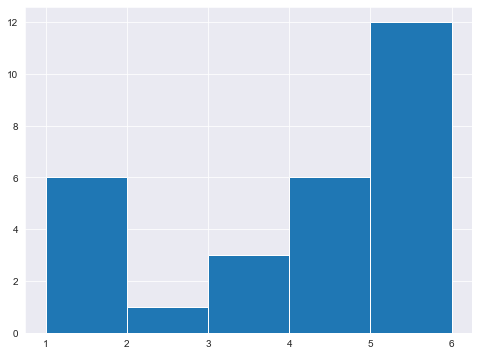

In [12]:
sns.set_style('dark')
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
Ndf['rating-Count'].hist(bins=5)

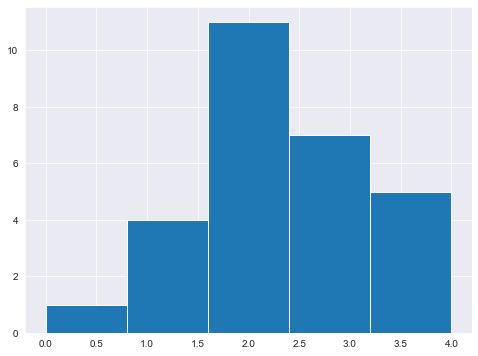

In [13]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
Ndf['Rating'].hist(bins=5)

<Figure size 576x432 with 0 Axes>

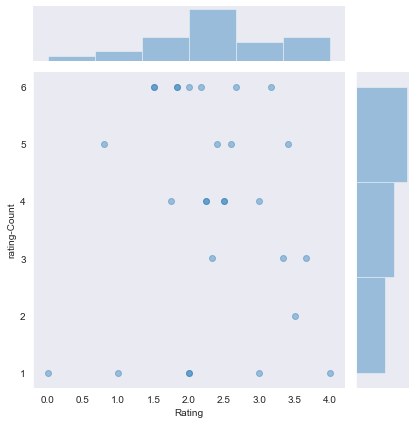

In [14]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
sns.jointplot(x='Rating', y='rating-Count', data=Ndf, alpha=0.4)

In [15]:
#Matrix of Books with ratings
usersBookRating=df.pivot_table(index='CustomerID', columns='BookID', values='Rating')

In [16]:
usersBookRating

BookID,1,2,3,4,5,6,8,9,10,11,...,20,21,22,23,24,25,26,27,28,29
CustomerID,,,,,,,,,,,,,,,,,,,,,
1,2.0,0.0,2.0,2.0,5.0,2.0,0.0,1.0,3.0,2.0,...,3.0,2.0,2.0,3.0,2.0,2.0,0.0,1.0,5.0,2.0
2,0.0,4.0,1.0,NaN,5.0,1.0,1.0,1.0,1.0,1.0,...,NaN,3.0,0.0,4.0,4.0,4.0,NaN,NaN,1.0,1.0
3,5.0,1.0,5.0,NaN,1.0,4.0,5.0,2.0,5.0,2.0,...,NaN,3.0,3.0,NaN,3.0,0.0,NaN,NaN,0.0,1.0
4,3.0,4.0,2.0,NaN,NaN,NaN,2.0,3.0,0.0,2.0,...,NaN,1.0,5.0,NaN,4.0,0.0,NaN,NaN,3.0,4.0
5,NaN,4.0,NaN,NaN,NaN,NaN,0.0,2.0,NaN,NaN,...,NaN,3.0,0.0,NaN,4.0,3.0,NaN,NaN,NaN,0.0
6,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,NaN,NaN,...,NaN,1.0,1.0,NaN,NaN,0.0,NaN,NaN,NaN,4.0


In [18]:
#Customer Rating for book 9
usersBookRating[9]

CustomerID
1    1.0
2    1.0
3    2.0
4    3.0
5    2.0
6    2.0
Name: 9, dtype: float64

In [19]:
booksLikeBook7=usersBookRating.corrwith(usersBookRating[9])

/Users/mg/Documents/projects/projects/lib/python3.7/site-packages/numpy/lib/function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/Users/mg/Documents/projects/projects/lib/python3.7/site-packages/numpy/lib/function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [20]:
book7correlation=pd.DataFrame(booksLikeBook7,columns=['Correlation'])
book7correlation.dropna(inplace=True)

In [21]:
book7correlation.sort_values('Correlation', ascending=False).head(10)

,Correlation
BookID,
13,1.000000
9,1.000000
6,0.944911
19,0.852803
22,0.661659
1,0.585369
11,0.522233
29,0.476331
24,0.467707


In [22]:
ratingNcount=book7correlation.join(Ndf['rating-Count'])

In [23]:
threshold=3
ratingNcount[ratingNcount['rating-Count']>threshold].sort_values('Correlation',ascending=False)

,Correlation,rating-Count
BookID,,
9,1.000000,6
13,1.000000,5
19,0.852803,4
22,0.661659,6
1,0.585369,4
11,0.522233,4
29,0.476331,6
24,0.467707,5
2,0.398541,5
